# Quick Evaluation

In [1]:
import numpy as np 
import pandas as pd 
from pymoo.indicators.hv import HV
import matplotlib.pyplot as plt
from Plugins import evaluation_methods
from Plugins import cd_diagram

In [2]:
#PROBLEMS AND OBJECTIVES
#WFG Problems 
wfg_problems = ['wfg1', 'wfg2', 'wfg3', 'wfg4', 'wfg5', 'wfg6', 'wfg7', 'wfg8', 'wfg9']
#DTLZ Problems 
dtlz_problems = ['dtlz1', 'dtlz2', 'dtlz3', 'dtlz4', 'dtlz5', 'dtlz6', 'dtlz7']
#ZDT Problems 
zdt_problems = ['zdt1', 'zdt2', 'zdt3', 'zdt4', 'zdt6']
#Summary problems 
problems = wfg_problems + dtlz_problems + zdt_problems

In [3]:
operators = ['baseline', 'sam_energy', 'sam_redd','sam_mssd','sam_uniform', 'mut_dirichlet', 
             'mut_lognormal', 'mut_exponential', 'mut_normal']

## NSGA-II

In [4]:
DF =evaluation_methods.get_final_reports(['nsgaii'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaii'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['nsgaii'], zdt_problems, 2, operators, 20)

In [5]:
nsgaii_summary = evaluation_methods.merge_dataframes('nsgaii', wfg_problems+dtlz_problems+zdt_problems)
nsgaii_summary

,Algorithm,Problem,Operator,Execucion,Generation,HV_gen
0,nsgaii,wfg1,baseline,0,249,1.208049
1,nsgaii,wfg1,baseline,1,249,1.204978
2,nsgaii,wfg1,baseline,2,249,1.200806
3,nsgaii,wfg1,baseline,3,249,1.195120
4,nsgaii,wfg1,baseline,4,249,1.207810
...,...,...,...,...,...,...
175,nsgaii,zdt6,mut_normal,15,249,0.246030
176,nsgaii,zdt6,mut_normal,16,249,0.249873
177,nsgaii,zdt6,mut_normal,17,249,0.242206
178,nsgaii,zdt6,mut_normal,18,249,0.235918


In [6]:
nsgaii_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(9)

HV_gen          
                             mean       std
Problem Operator                           
dtlz1   baseline         1.228632  0.008552
        mut_dirichlet    1.313474  0.004579
        mut_exponential  1.310479  0.017378
        mut_lognormal    1.229601  0.022830
        mut_normal       1.233024  0.030021
        sam_energy       1.307075  0.007658
        sam_mssd         1.308422  0.009647
        sam_redd         1.303940  0.020232
        sam_uniform      1.299152  0.027684

In [7]:
SS = evaluation_methods.conteo_winners('nsgaii', problems, ['baseline', 'sam_energy', 'sam_uniform','sam_mssd','sam_redd'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,1,3,3,12,41
sam_energy,9,6,3,0,3,81
sam_uniform,2,3,4,9,3,55
sam_mssd,6,7,4,2,2,76
sam_redd,2,4,7,7,1,62


In [8]:
SS = evaluation_methods.conteo_winners('nsgaii', problems, ['baseline', 'mut_dirichlet', 'mut_lognormal', 'mut_exponential', 'mut_normal'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,4,7,0,8,55
mut_dirichlet,16,1,0,3,1,91
mut_lognormal,0,2,4,9,6,44
mut_exponential,3,10,4,2,2,73
mut_normal,0,4,6,7,4,52


['baseline' 'mut_dirichlet' 'mut_exponential' 'mut_lognormal' 'mut_normal'
 'sam_energy' 'sam_mssd' 'sam_redd' 'sam_uniform']
baseline            1.0
mut_dirichlet      12.0
mut_exponential     3.0
mut_lognormal       0.0
mut_normal          0.0
sam_energy          2.0
sam_mssd            2.0
sam_redd            0.0
sam_uniform         1.0
dtype: float64
mut_lognormal      7.047619
mut_normal         6.666667
baseline           6.428571
sam_uniform        5.380952
sam_redd           4.857143
mut_exponential    4.333333
sam_mssd           4.095238
sam_energy         3.666667
mut_dirichlet      2.523810
dtype: float64
('mut_lognormal', 'sam_energy', 0.00016117095947265625, True)
('mut_normal', 'sam_energy', 0.00024127960205078125, True)
('mut_lognormal', 'sam_mssd', 0.00035381317138671875, True)
('mut_normal', 'sam_mssd', 0.00042629241943359375, True)
('mut_dirichlet', 'mut_lognormal', 0.0008516311645507812, True)
('baseline', 'sam_energy', 0.0010023117065429688, True)
('mut_lognormal', 

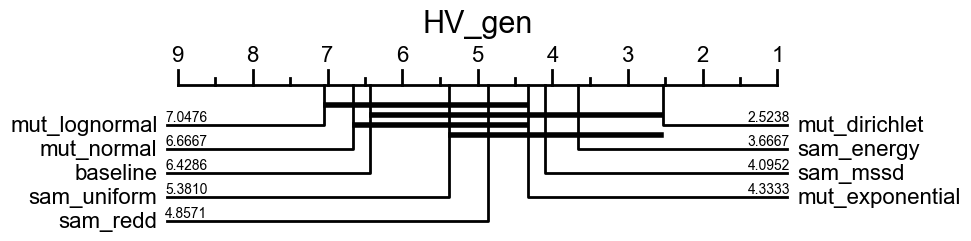

In [9]:
nsgaii_summary = evaluation_methods.merge_dataframes('nsgaii', wfg_problems+dtlz_problems+zdt_problems)
nsgaii_summary = nsgaii_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=nsgaii_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)

## AGE-MOEA

In [10]:
DF =evaluation_methods.get_final_reports(['age_moea'], wfg_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['age_moea'], dtlz_problems, 3, operators, 20)
DF =evaluation_methods.get_final_reports(['age_moea'], zdt_problems, 2, operators, 20)

In [11]:
age_moea_summary = evaluation_methods.merge_dataframes('age_moea', wfg_problems+dtlz_problems+zdt_problems)
age_moea_summary

,Algorithm,Problem,Operator,Execucion,Generation,HV_gen
0,age_moea,wfg1,baseline,0,249,1.208704
1,age_moea,wfg1,baseline,1,249,1.198873
2,age_moea,wfg1,baseline,2,249,1.208398
3,age_moea,wfg1,baseline,3,249,1.199943
4,age_moea,wfg1,baseline,4,249,1.202833
...,...,...,...,...,...,...
175,age_moea,zdt6,mut_normal,15,249,0.243363
176,age_moea,zdt6,mut_normal,16,249,0.250727
177,age_moea,zdt6,mut_normal,17,249,0.240950
178,age_moea,zdt6,mut_normal,18,249,0.236220


In [12]:
age_moea_summary.groupby(['Problem', 'Operator']).agg({'HV_gen': ['mean', 'std']}).head(8)

HV_gen          
                             mean       std
Problem Operator                           
dtlz1   baseline         1.231826  0.004062
        mut_dirichlet    1.314239  0.001629
        mut_exponential  1.248280  0.037105
        mut_lognormal    1.232728  0.014216
        mut_normal       1.232774  0.010901
        sam_energy       1.308451  0.008814
        sam_mssd         1.307522  0.007060
        sam_redd         1.288033  0.032719

In [15]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'sam_energy', 'sam_uniform', 'sam_energy', 'sam_mssd'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,1,1,6,13,0,53
sam_energy,7,11,3,0,0,88
sam_uniform,3,1,12,5,0,65
sam_mssd,10,8,0,3,0,88


In [17]:
SS = evaluation_methods.conteo_winners('age_moea', problems, ['baseline', 'mut_dirichlet', 'mut_exponential', 'mut_lognormal', 'mut_normal'])
n = 5
SS['Borda'] = [ row.to_numpy()@np.array(range(n, 0,-1)) for idx, row in SS.iterrows() ]
SS

,0,1,2,3,4,Borda
baseline,2,5,7,2,5,60
mut_dirichlet,16,4,0,0,1,97
mut_exponential,2,10,5,1,3,70
mut_lognormal,0,1,4,10,6,42
mut_normal,1,1,5,8,6,46


['baseline' 'mut_dirichlet' 'mut_exponential' 'mut_lognormal' 'mut_normal'
 'sam_energy' 'sam_mssd' 'sam_redd' 'sam_uniform']
baseline            0.0
mut_dirichlet      13.0
mut_exponential     1.0
mut_lognormal       0.0
mut_normal          0.0
sam_energy          2.0
sam_mssd            4.0
sam_redd            0.0
sam_uniform         1.0
dtype: float64
mut_lognormal      7.476190
mut_normal         7.380952
baseline           6.476190
mut_exponential    5.285714
sam_uniform        5.190476
sam_redd           4.714286
sam_energy         3.190476
sam_mssd           3.190476
mut_dirichlet      2.095238
dtype: float64
('mut_lognormal', 'sam_energy', 9.5367431640625e-06, True)
('mut_normal', 'sam_energy', 1.33514404296875e-05, True)
('baseline', 'sam_energy', 1.811981201171875e-05, True)
('mut_lognormal', 'sam_mssd', 3.147125244140625e-05, True)
('mut_normal', 'sam_mssd', 3.147125244140625e-05, True)
('baseline', 'sam_mssd', 0.00016117095947265625, True)
('mut_dirichlet', 'mut_lognormal',

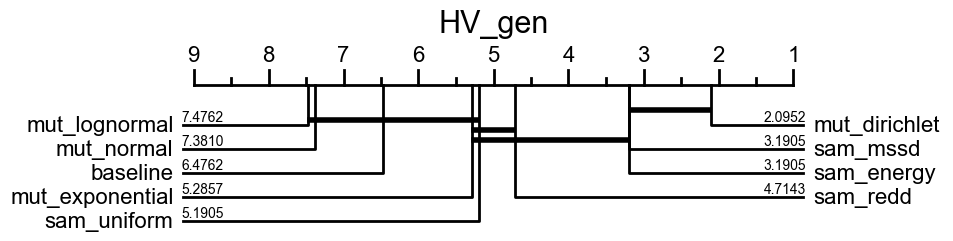

In [18]:
age_moea_summary = evaluation_methods.merge_dataframes('age_moea', wfg_problems+dtlz_problems+zdt_problems)
age_moea_summary = age_moea_summary.groupby(['Operator', 'Problem'], as_index=False).agg({'HV_gen': 'mean'})
cd_diagram.draw_cd_diagram(df_perf=age_moea_summary[['Operator', 'Problem', 'HV_gen']], title='HV_gen', labels=True)